In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Evaluating Model Performance

In the last notebook we trained two different linear models to the diabetes dataset. How are we to quantitatively say that one model is better than the other? Here's where another method of scikit-learn estimators comes into play: the score.

```
>>> estimator = Estimator()
>>> estimator.fit(train_data)
>>> estimator.score(test_data)
```

The score is some measure of the quality of the fit to the given data. Higher scores are better. The exact score function changes for the estimator, and there are ways to [code up your own scoring functions](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html). For both the linear and Lasso regressors covered in the last notebook, the score is the coefficient of determination $R^2$.

Let's see how each model did.

In [3]:
# Load the dataset
from sklearn import datasets

diabetes = datasets.load_diabetes()
X_train = diabetes.data[:-20]
X_test = diabetes.data[-20:]
y_train = diabetes.target[:-20]
y_test = diabetes.target[-20:]

# Train linear and lasso regressors
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
lasso = linear_model.Lasso()
lasso.fit(X_train, y_train)

# See the scores on the test data
print('Linear regression:', regr.score(X_test, y_test))
print('Lasso regression:', lasso.score(X_test, y_test))

Linear regression: 0.5850753022690571
Lasso regression: 0.3713190845037463


Looks like quantitatively speaking, the linear regressor performed better than Lasso.

# Hyperparameters and Grid Search Cross-validation

We haven't yet mentioned an important parameter of the Lasso regressor -- the learning rate $\alpha$. This parameter effectively quantifies the sparsity of the learned coefficients; higher values of $\alpha$ result in sparser coefficients, and $\alpha=0$ is identical to normal linear regression.

$\alpha$ is an example of a hyperparameter: a parameter of the model itself that can be tuned to improve the performance of the model on a dataset.

In our example above, we may have found that the default value of $\alpha$ is not the best value for the data. We can search for the best value of using grid search cross-validation, where we evaluate the score of fit estimators using a wide range of hyperparameter values.

Text(0,0.5,'$R^2$')

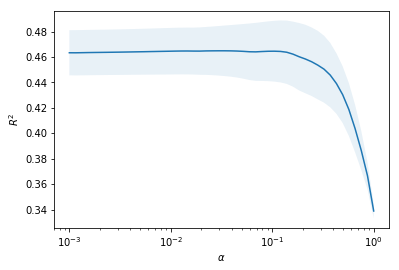

In [58]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# Define alpha values to search through
alphas = np.logspace(-3, 0, 50)
# Set up grid search
gscv = GridSearchCV(estimator=lasso, param_grid=dict(alpha=alphas), return_train_score=False)
# Fit all estimators
gscv.fit(X_train, y_train)

# Plot CV results
plt.plot(alphas, gscv.cv_results_['mean_test_score'])
plt.fill_between(alphas,
                 gscv.cv_results_['mean_test_score']+gscv.cv_results_['std_test_score'],
                 gscv.cv_results_['mean_test_score']-gscv.cv_results_['std_test_score'],
                 alpha=0.1)
plt.xscale('log')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$')

In [62]:
# Find the estimator with the best score
best_lasso = gscv.best_estimator_

# Compare best Lasso to default Lasso and linear regressor
print('Linear regression:', regr.score(X_test, y_test))
print('Default Lasso regression:', lasso.score(X_test, y_test))
print('Best Lasso regression (alpha={:0.3f}):'.format(best_lasso.alpha), best_lasso.score(X_test, y_test))

Linear regression: 0.5850753022690571
Default Lasso regression: 0.3713190845037463
Best Lasso regression (alpha=0.034): 0.5883935396856639


We can see that the Lasso regressor with properly selected $\alpha$ performs slightly better than the linear regressor on this dataset.